# CS342 Machine Learning
## Lab 7: Convolutional neural networks

### Department of Computer Science, University of Warwick

In this lab, you will create a convolutional neural network (CNN) to classify the images of the MNIST dataset, a widely-used dataset of hand-written digits. We will use the images that have been denoised using your denoising autoencoder from **Lab 6**. If you have not yet completed lab 6, images that have already been de-noised are available to use instead. However, you are encouraged to use your own denoised images to get top marks.

The datasets for this lab are larger than those for previous labs. Therefore, we will load the data directly from the module directory, as shown below. If you would like to work on the lab using your own machine, copy the data across by running the following command in a terminal window:

```scp USERNAME@login-3.dcs.warwick.ac.uk:/modules/cs342/2019/lab7/data/* .```

After entering your DCS password, this will copy the data to your current working directory.

Load the data required for this lab. **If you have completed Lab 6, replace ```mnist_test_x_denoised.npy``` with your own denoised data.**

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import SGD
train_x = np.load('/modules/cs342/2019/lab7/data/mnist_train_x.npy')
train_y = np.load('/modules/cs342/2019/lab7/data/mnist_train_y.npy')
test_x_noisy = np.load('/modules/cs342/2019/lab7/data/mnist_test_x.npy')
#test_x_denoised = np.load('/modules/cs342/2019/lab7/data/mnist_test_x_denoised.npy')
test_x_denoised = np.load('./data/mnist_test_x_denoised.npy') #my data from lab 6
test_y = np.load('/modules/cs342/2019/lab7/data/mnist_test_y.npy')


Using TensorFlow backend.
/local/java/python-pip-packages.cs342/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/local/java/python-pip-packages.cs342/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/local/java/python-pip-packages.cs342/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/loca

The MNIST dataset consists of 60,0000 training images and 5,000 testing images. Each image is labelled with the digit it depicts, from 0 to 9. 

In [2]:
print('train_x shape:         ', train_x.shape)
print('train_y shape:         ', train_y.shape)
print('test_x_noisy shape:   ', test_x_noisy.shape)
print('test_x_denoised shape: ', test_x_denoised.shape)
print('test_y shape:          ', test_y.shape)

train_x shape:          (60000, 28, 28)
train_y shape:          (60000,)
test_x_noisy shape:    (5000, 28, 28)
test_x_denoised shape:  (5000, 784)
test_y shape:           (5000,)


## 1. Prepare the MNIST dataset for classification (5 marks)

1. Normalize the training and test data to the range 0 to 1.


2. Convert the training and test labels to one-hot encoded vectors.


3. Use the ```np.expand_dims``` function to add an additional dimension to the training and test data in the last axis; i.e., the shape of the training set after this operation should be ```(60000, 28, 28, 1)``` . Convolutional layers in Keras expect each data point to have 3 dimensions: width, height and color channels. As the MNIST dataset consists of greyscale images, the number of channels is equal to 1.

In [3]:
train_data = np.reshape(train_x,(60000,28,28))/255
test_data = np.reshape(test_x_noisy,(5000,28,28))/255
y_hot_train = keras.utils.to_categorical(train_y)
y_hot_test = keras.utils.to_categorical(test_y)

test_data_denoised = np.reshape(test_x_denoised,(5000,28,28)) # already normalized

train_data_3ax = np.expand_dims(train_data,axis=3)
test_data_3ax = np.expand_dims(test_data,axis=3)
test_data_d_3ax = np.expand_dims(test_data_denoised,axis=3)

print(y_hot_train[1])
print(train_data_3ax.shape)
print(test_data_d_3ax.shape)


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
(60000, 28, 28, 1)
(5000, 28, 28, 1)


In [4]:
import matplotlib.pyplot as plt

def display_mnist(data):
    fig = plt.figure(figsize=(12,12))
    for i in range(5):
        axe = fig.add_subplot(1,5,i+1)
        plt.imshow(data[i].reshape(28,28), cmap = 'gray')

plt.show()

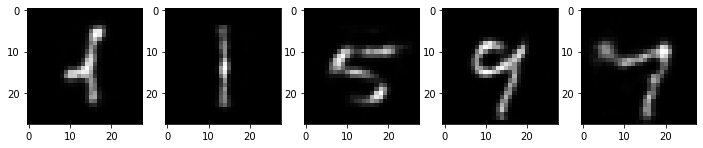

In [5]:
display_mnist(test_data_d_3ax[:5])

## 2. Design a CNN to classify images from the MNIST dataset (50 marks)


Use ```mnist_train_x.npy``` as the training data and ```mnist_test_x_denoised.npy``` to test your CNN. Your model should predict the label associated with each image, i.e., ```mnist_train_y.npy``` and ```mnist_test_y.npy``` for the training and test data, respectively. 

Use your knowledge of the different types of layers and their purpose to build a model that performs well on the testing data. You will be assessed on both the design of your model and its performance on the test data.


You may use any combination of the following layers in Keras:

- ```Conv2D()```
- ```Dense()```

You do not need to use all layer types if you do not deem it necessary to do so. You may also use the ```Flatten()```, ```MaxPooling2D()```, and ```Dropout()``` operations. These operations are added to the model in the same way as the layers above but are not considered additional layers in themselves.

Once you have designed your CNN model, use the ```model.compile```, ```model.fit```, and ```model.evaluate``` functions to train and test your model.

**You must design your model according to the following requirements:**

1. Each training epoch must require no more than 20 seconds to complete on a DCS machine.

2. The model should be trained for a maximum of 5 epochs.

3. The model must use no more than 7 layers in total.

This question will be marked according to the following criteria:

##### Criterion 1: Design (25 marks)
- Usage of your own denoised images from Lab 6  (5 marks)
- Usage of some form of regularization (10 marks)
- Sensible CNN architecture design (10 marks)


##### Criterion 2: Performance (25 marks)
- 70%+ Accuracy on the test set (+5 marks)
- 80%+ Accuracy on the test set (+10 marks)
- 85%+ Accuracy on the test set (+10 marks)

In [9]:
sgd = SGD(learning_rate=0.05)
model = Sequential()

model.add(Conv2D(50, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Conv2D(30, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(64, use_bias='true', activation='sigmoid'))
model.add(Dense(32, use_bias='true', activation='sigmoid'))
model.add(Dense(10,use_bias='true',activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=sgd , metrics=['accuracy'])

model.fit(train_data_3ax, y_hot_train, epochs=5, batch_size=64, verbose=1)


Epoch 1/5
60000/60000 [==============================] - 11s 190us/step - loss: 0.4258 - accuracy: 0.8661
Epoch 2/5
60000/60000 [==============================] - 11s 188us/step - loss: 0.1453 - accuracy: 0.9559
Epoch 3/5
60000/60000 [==============================] - 11s 190us/step - loss: 0.1110 - accuracy: 0.9654
Epoch 4/5
60000/60000 [==============================] - 11s 189us/step - loss: 0.0975 - accuracy: 0.9699
Epoch 5/5
60000/60000 [==============================] - 12s 194us/step - loss: 0.0855 - accuracy: 0.9734


In [10]:
score = model.evaluate(test_data_d_3ax, y_hot_test, batch_size=64)
print ('the accuray is', score[1]*100, '%')

5000/5000 [==============================] - 0s 57us/step
the accuray is 91.97999835014343 %


## 3. Discuss your key design choices for the CNN architecture in exercise 2 (30 marks)

Consider your architecture design choices in the previous exercise. Discuss your design choices for creating an effective model. In your discussion, please consider:

a. Choice of activation functions.

b. Choice of loss function.

c. Choice of layer type and the purpose of using layers of this type.

# Answer:

Having done some research on CNNs, I decided to use a structure similar to LeNet-5. This means having the Conv2d layers at the beginning, each one followed by a MaxPooling2D layer to reduce the time needed for each epochs.
When looking at the kernel parameter, the choice was made to have less layers to have a kernel of 3 for each Conv2D layers.

The Dropout layer should reduce the overfitting effect and increase the running speed slightly.
2 hidden Dense layers help increasing the accuracy and the output layer has 10 neurons as the one hot encoded vectors have 10 elements in their arrays. The output has a softmax activation function rather than a sigmoid as it was found through testing than the CNN would gain in accuracy.

It is important to notice that the activation functions for the Conv2D layers and the Dense ones are different. After some testing, Conv2D seemed to work better with a relu activation function, when the Dense layers work better with a sigmoid function.

The Loss function is categorical_crossentropy as there are 10 different classes. I used binary_crossentropy by inattention for sometimes and the CNN would look like it was working well. However, it was only assigning the right values to one class and not split the data between the ten categories.

A mistake I made at the beginning was to have a learning rate quite high. This would lead to a poor accuracy. When reduced to 0.05, the CNN worked a lot more effectively.


## 4. Test your CNN using MNIST images before denoising (15 marks)
Test your CNN using the noisy images (```mnist_test_x.npy```) after training on the clean images (```mnist_train_x.npy```). How does the model perform compared to testing with the denoised images? Please explain your observations. 

In [11]:
score = model.evaluate(test_data_3ax, y_hot_test, batch_size=64)
print ('the accuray is', score[1]*100, '%')

5000/5000 [==============================] - 0s 54us/step
the accuray is 81.19999766349792 %


## 5. Deliverables

Submit via Tabula:

1. The code and discussions for Lab 6 and Lab 7 as separate Jupyter files.

2. Your own denoised data ```mnist_test_x_denoised.npy``` if these data were used in this Lab.
